In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score




In [65]:
df = pd.read_csv('vaka_analizi.csv')


In [66]:
df.groupby(['Gender','Customer type']).agg({'Total':'sum'}).sort_values('Total',ascending=False)

Total
Gender Customer type            
Female Member         88146.9435
       Normal         79735.9815
Male   Normal         79007.3235
       Member         76076.5005

In [67]:
df.groupby(['Product line','Customer type','Gender']).agg({'Total':'sum'}).sort_values('Total',ascending=False)

Total
Product line           Customer type Gender            
Food and beverages     Member        Female  19598.8065
Health and beauty      Member        Male    17451.6510
Home and lifestyle     Member        Female  17234.3220
Sports and travel      Member        Female  16658.2185
Electronic accessories Normal        Female  15948.4710
Fashion accessories    Normal        Female  15314.7435
                       Member        Female  15122.6565
Sports and travel      Normal        Male    14972.0235
Electronic accessories Normal        Male    13890.5655
Food and beverages     Normal        Female  13572.1110
Electronic accessories Member        Male    13344.9435
Health and beauty      Normal        Male    13181.1015
Home and lifestyle     Normal        Male    13081.3305
                                     Female  12802.5555
Fashion accessories    Normal        Male    12667.1895
Sports and travel      Normal        Female  11916.5025
Food and beverages     Member        Male    11758.8135
Sports and travel      Member        Male    11576.0820
Food and beverages     Normal        Male    11215.1130
Fashion accessories    Member        Male    11201.3055
Electronic accessories Member        Female  11153.5515
Home and lifestyle     Member        Male    10743.7050
Health and beauty      Normal        Female  10181.5980
                       Member        Female   8379.3885

In [68]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [70]:
product_types =df['Product line'].unique()

In [71]:
df.groupby(['Payment']).agg({'Total':'sum'}).sort_values('Total',ascending=False)

,Total
Payment,
Cash,112206.570
Ewallet,109993.107
Credit card,100767.072


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [73]:
df.shape

(1000, 17)

In [74]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

In [75]:
df.groupby('Product line').agg({'Total': 'mean'}).sort_values(by='Total', ascending=False)

,Total
Product line,
Home and lifestyle,336.636956
Sports and travel,332.065220
Health and beauty,323.643020
Food and beverages,322.671517
Electronic accessories,319.632538
Fashion accessories,305.089298


In [76]:
df['Date']=df['Date'].str.replace('/','-')

In [77]:
df['Date'] = pd.to_datetime(df['Date'])

In [78]:
df['Date'].min()

Timestamp('2019-01-01 00:00:00')

In [79]:
global_names = []

unique_products = df['Product line'].unique()

for product_name in unique_products:
    globals()[product_name] = df[df['Product line'] == product_name]
    global_names.append(product_name)

print(f"{len(global_names)} adet global değişken oluşturuldu:")
print(global_names)

6 adet global değişken oluşturuldu:
['Health and beauty', 'Electronic accessories', 'Home and lifestyle', 'Sports and travel', 'Food and beverages', 'Fashion accessories']


Health and beauty


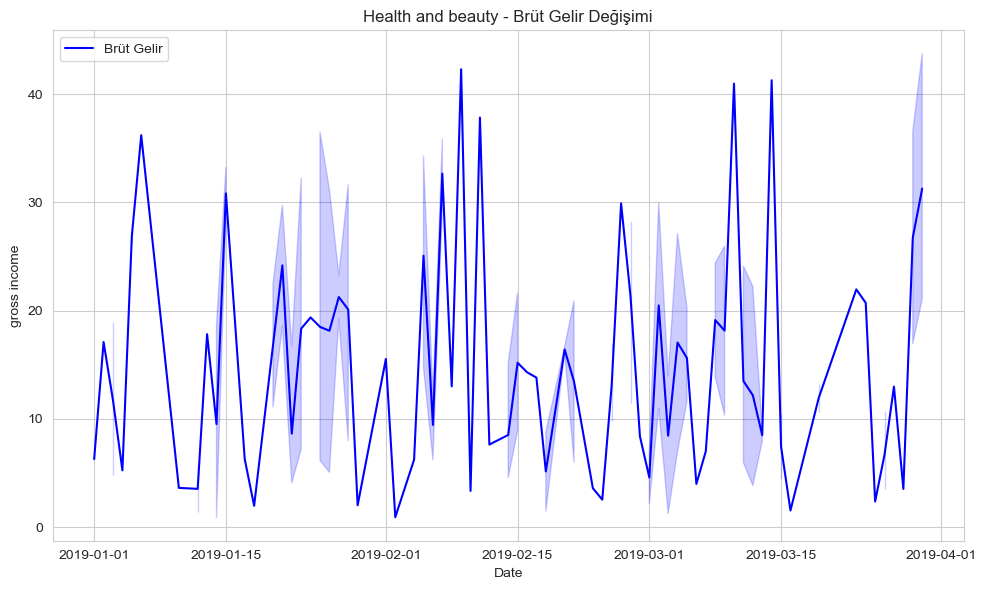

Electronic accessories


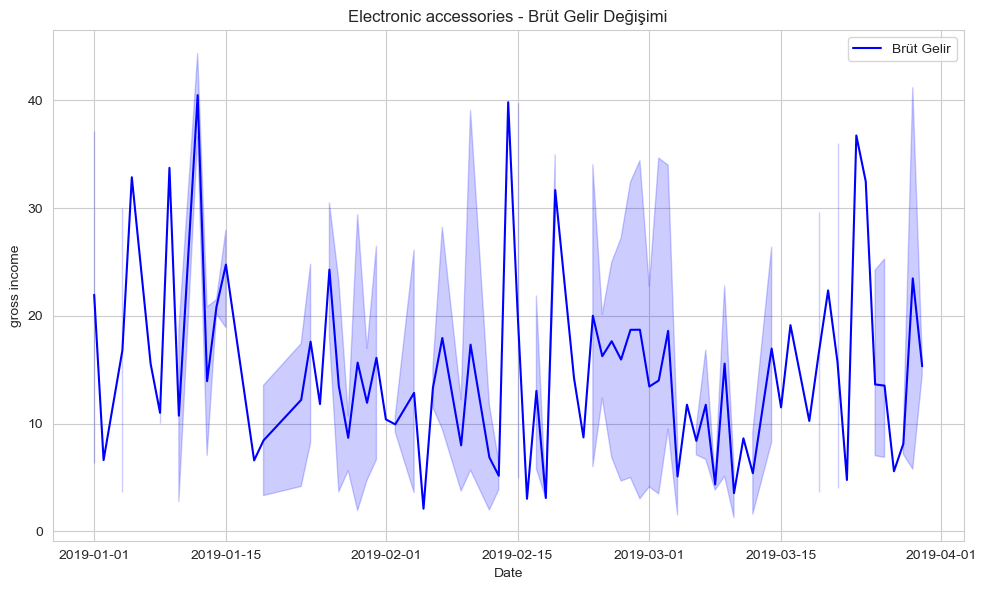

Home and lifestyle


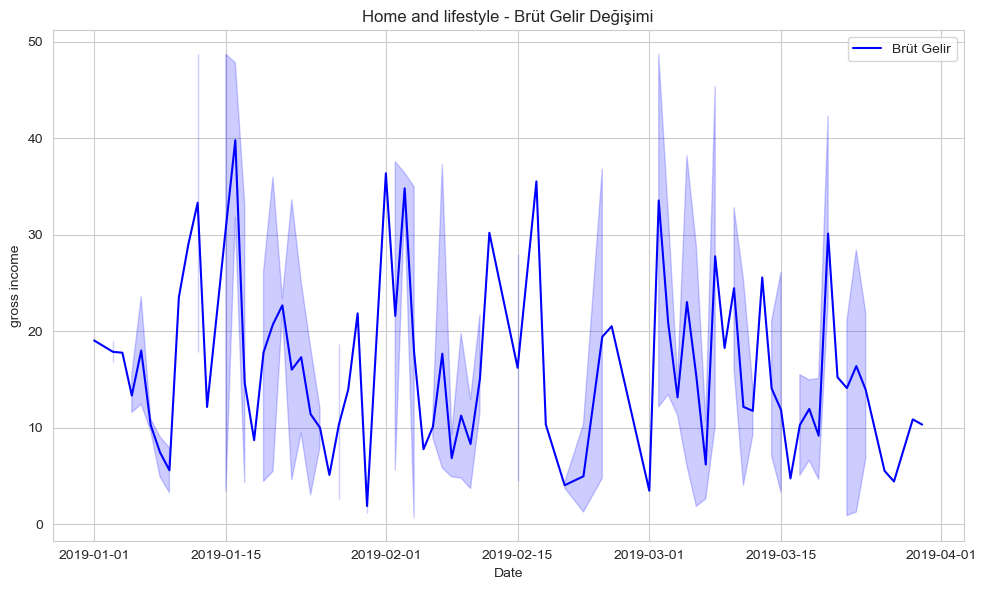

Sports and travel


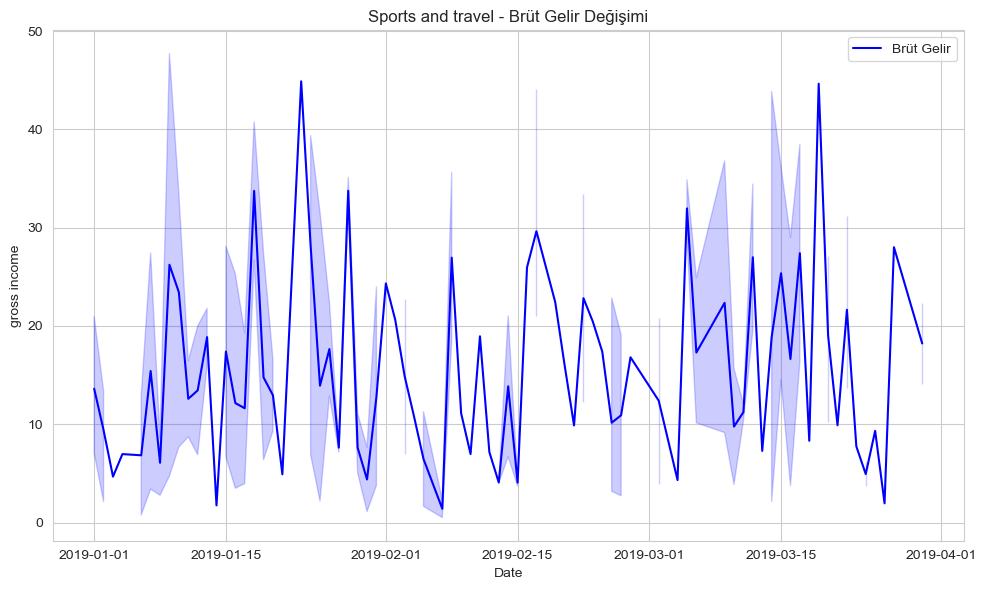

Food and beverages


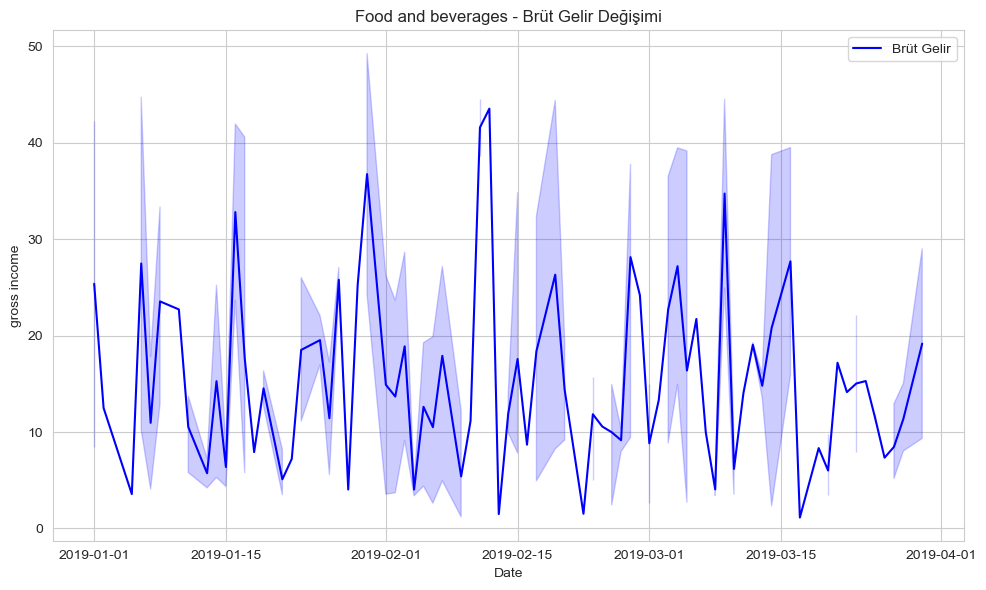

Fashion accessories


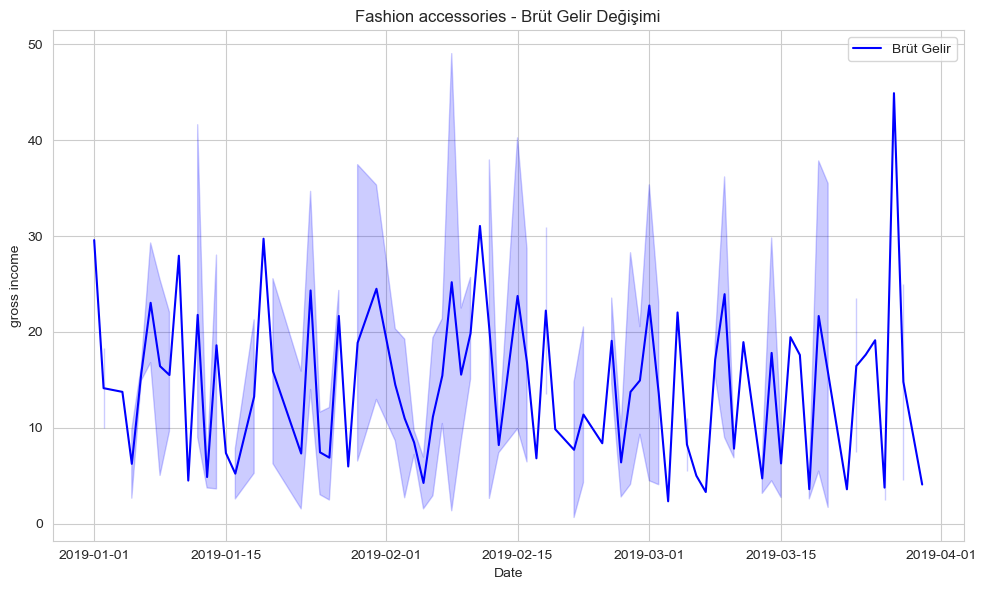

In [80]:
for i in range(len(global_names)):
    print(global_names[i])
    plt.figure(figsize=(10, 6))  
    
    sns.lineplot(x='Date', y='gross income', data=globals()[global_names[i]], 
                 color='blue', label='Brüt Gelir')
    
    
    
    
    plt.title(f"{global_names[i]} - Brüt Gelir Değişimi")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [81]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [82]:
df.groupby(['Branch','Gender','Customer type']).agg({'Total':'mean'}).sort_values('Total',ascending=False)

Total
Branch Gender Customer type            
C      Female Member         360.973375
       Male   Normal         346.174091
B      Female Normal         338.673545
       Male   Member         335.678175
A      Female Member         333.038344
C      Female Normal         329.658768
A      Female Normal         328.717278
B      Female Member         315.887435
A      Male   Member         310.280552
C      Male   Member         304.490938
B      Male   Normal         293.501367
A      Male   Normal         281.921690

In [83]:
df_cat = df.groupby(['Branch','Gender','Customer type']).agg({'Total':'std'}).sort_values('Total',ascending=False)
df_cat = df_cat.reset_index()
df_cat['up_lim']= df_cat['Total']*1.25
df_cat['low_lim']= df_cat['Total']*0.25
df_cat 

,Branch,Gender,Customer type,Total,up_lim,low_lim
0,C,Female,Member,287.170397,358.962996,71.792599
1,C,Male,Normal,279.467822,349.334777,69.866955
2,B,Female,Normal,259.032799,323.790999,64.758200
3,C,Male,Member,245.350352,306.687940,61.337588
4,B,Male,Member,243.677591,304.596989,60.919398
5,B,Female,Member,242.894226,303.617782,60.723556
6,A,Female,Member,238.705459,298.381824,59.676365
7,A,Male,Normal,237.086551,296.358189,59.271638
8,C,Female,Normal,233.027083,291.283854,58.256771
9,A,Female,Normal,228.833080,286.041351,57.208270


In [84]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [85]:
df_cat 

,Branch,Gender,Customer type,Total,up_lim,low_lim
0,C,Female,Member,287.170397,358.962996,71.792599
1,C,Male,Normal,279.467822,349.334777,69.866955
2,B,Female,Normal,259.032799,323.790999,64.758200
3,C,Male,Member,245.350352,306.687940,61.337588
4,B,Male,Member,243.677591,304.596989,60.919398
5,B,Female,Member,242.894226,303.617782,60.723556
6,A,Female,Member,238.705459,298.381824,59.676365
7,A,Male,Normal,237.086551,296.358189,59.271638
8,C,Female,Normal,233.027083,291.283854,58.256771
9,A,Female,Normal,228.833080,286.041351,57.208270


In [86]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


In [87]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

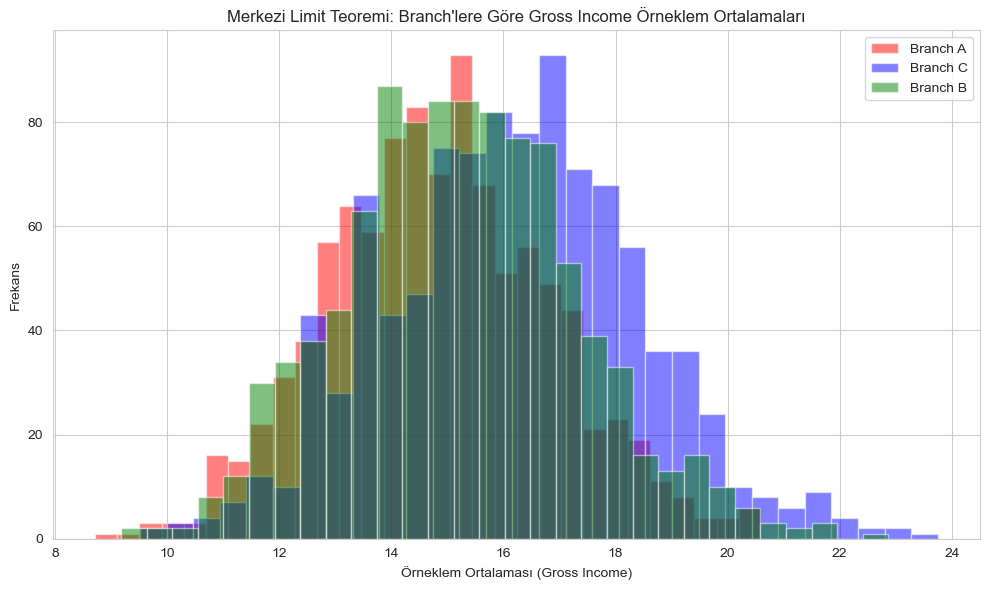

In [88]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42) 

sample_size = 30
n_samples = 1000
branches = df['Branch'].unique()
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(10,6))

for i, branch in enumerate(branches):
    branch_data = df[df['Branch'] == branch]['gross income'].values
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(branch_data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    plt.hist(sample_means, bins=30, alpha=0.5, color=colors[i % len(colors)], label=f'Branch {branch}')

plt.title('Merkezi Limit Teoremi: Branch\'lere Göre Gross Income Örneklem Ortalamaları')
plt.xlabel('Örneklem Ortalaması (Gross Income)')
plt.ylabel('Frekans')
plt.legend()
plt.tight_layout()
plt.show()

In [89]:
from scipy.stats import f_oneway

sample_size = 30
n_samples = 1000
branches = df['Branch'].unique()
branch_sample_means = []

for branch in branches:
    branch_data = df[df['Branch'] == branch]['gross income'].values
    sample_means = [np.mean(np.random.choice(branch_data, size=sample_size, replace=True)) for _ in range(n_samples)]
    branch_sample_means.append(sample_means)

f_stat, p_value = f_oneway(*branch_sample_means)

print("Tek Yönlü ANOVA Sonucu:")
print(f"F istatistiği: {f_stat:.3f}")
print(f"p-değeri: {p_value:.5f}")

if p_value < 0.05:
    print("Sonuç: p < 0.05, en az bir Branch'in ortalaması anlamlı şekilde farklıdır.")
else:
    print("Sonuç: p >= 0.05, Branch'ler arasında anlamlı bir fark yoktur.")

Tek Yönlü ANOVA Sonucu:
F istatistiği: 63.854
p-değeri: 0.00000
Sonuç: p < 0.05, en az bir Branch'in ortalaması anlamlı şekilde farklıdır.


In [90]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

all_means = []
all_labels = []
for branch, means in zip(branches, branch_sample_means):
    all_means.extend(means)
    all_labels.extend([branch]*len(means))

tukey_df = pd.DataFrame({'mean': all_means, 'branch': all_labels})

tukey = pairwise_tukeyhsd(endog=tukey_df['mean'], groups=tukey_df['branch'], alpha=0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     A      B   0.2121 0.0738 -0.0154 0.4397  False
     A      C    1.038    0.0  0.8104 1.2655   True
     B      C   0.8258    0.0  0.5983 1.0534   True
---------------------------------------------------


In [91]:
df.columns 


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [92]:
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M').dt.time

# Min ve max değerlerini bul
min_time = df['Time'].min()
max_time = df['Time'].max()

print(f"En küçük zaman: {min_time}")
print(f"En büyük zaman: {max_time}")

En küçük zaman: 10:00:00
En büyük zaman: 20:59:00


In [93]:
import datetime as dt
def categorize_time(t):
  
    
    if dt.time(10, 0) <= t < dt.time(12, 45):
        return "Dilim 1 (10:00-12:45)"
    elif dt.time(12, 45) <= t < dt.time(15, 30):
        return "Dilim 2 (12:45-15:30)"
    elif dt.time(15, 30) <= t < dt.time(18, 15):
        return "Dilim 3 (15:30-18:15)"
    else:  # 18:15-20:59
        return "Dilim 4 (18:15-21:00)"

# Kategorileri oluştur
df['Time_Cat'] = df['Time'].apply(categorize_time)

# Sonuçları görüntüle
print("Zaman Dilimleri Dağılımı:")
print(df['Time_Cat'].value_counts())



Zaman Dilimleri Dağılımı:
Time_Cat
Dilim 2 (12:45-15:30)    265
Dilim 1 (10:00-12:45)    255
Dilim 4 (18:15-21:00)    251
Dilim 3 (15:30-18:15)    229
Name: count, dtype: int64


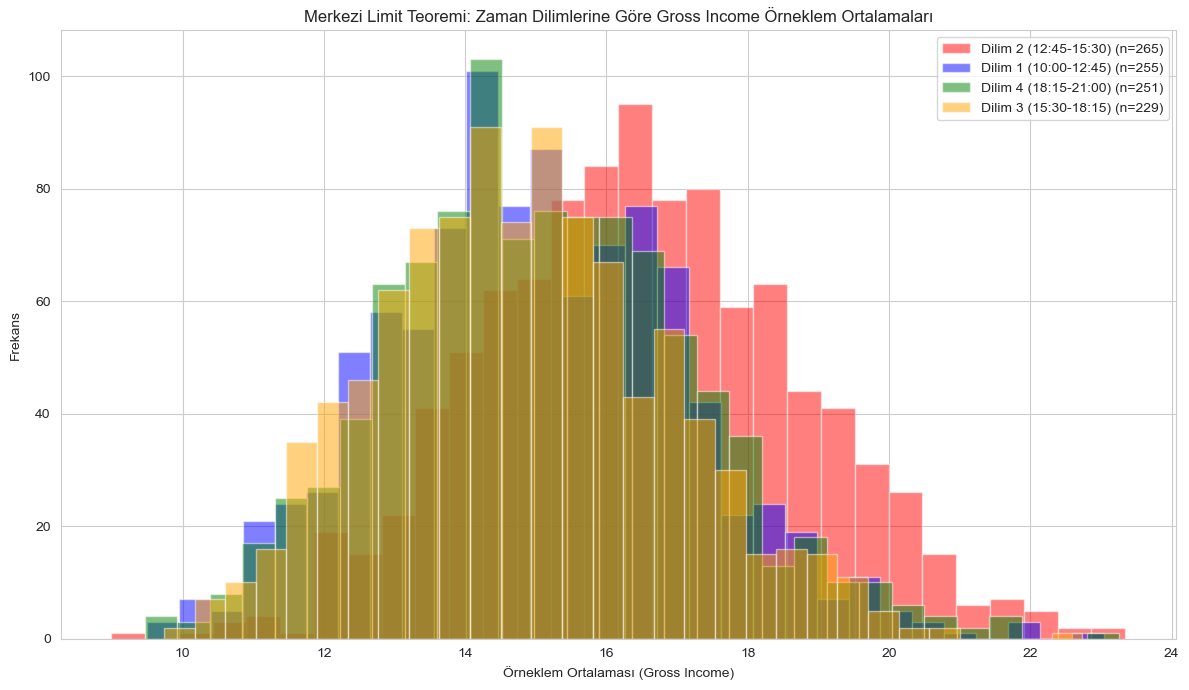


Zaman Dilimlerine Göre İstatistikler:
Dilim 2 (12:45-15:30):
  Veri Sayısı: 265
  Ortalama: 16.45
  Standart Sapma: 12.35
  Min: 0.51
  Max: 49.65

Dilim 1 (10:00-12:45):
  Veri Sayısı: 255
  Ortalama: 14.99
  Standart Sapma: 11.74
  Min: 0.63
  Max: 45.33

Dilim 4 (18:15-21:00):
  Veri Sayısı: 251
  Ortalama: 15.10
  Standart Sapma: 11.39
  Min: 0.60
  Max: 49.26

Dilim 3 (15:30-18:15):
  Veri Sayısı: 229
  Ortalama: 14.89
  Standart Sapma: 11.25
  Min: 0.77
  Max: 49.49



In [94]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)   

sample_size = 30
n_samples = 1000
time_cats = df['Time_Cat'].unique()  
colors = ['red', 'blue', 'green', 'orange', 'purple', 'brown']

plt.figure(figsize=(12,7))

for i, time_cat in enumerate(time_cats):
    
    timecat_data = df[df['Time_Cat'] == time_cat]['gross income'].values
    
    if len(timecat_data) < sample_size:
        print(f"Uyarı: {time_cat} için yeterli veri yok ({len(timecat_data)} adet). Bu dilim atlanıyor.")
        continue
    
    sample_means = []
    for _ in range(n_samples):
        sample = np.random.choice(timecat_data, size=sample_size, replace=True)
        sample_means.append(np.mean(sample))
    
    plt.hist(sample_means, bins=30, alpha=0.5, color=colors[i % len(colors)], 
             label=f'{time_cat} (n={len(timecat_data)})')

plt.title('Merkezi Limit Teoremi: Zaman Dilimlerine Göre Gross Income Örneklem Ortalamaları')
plt.xlabel('Örneklem Ortalaması (Gross Income)')
plt.ylabel('Frekans')
plt.legend()
plt.tight_layout()
plt.show()

print("\nZaman Dilimlerine Göre İstatistikler:")
for time_cat in time_cats:
    data = df[df['Time_Cat'] == time_cat]['gross income']
    print(f"{time_cat}:")
    print(f"  Veri Sayısı: {len(data)}")
    print(f"  Ortalama: {data.mean():.2f}")
    print(f"  Standart Sapma: {data.std():.2f}")
    print(f"  Min: {data.min():.2f}")
    print(f"  Max: {data.max():.2f}")
    print()

In [95]:
import numpy as np
import pandas as pd
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd

sample_size = 30
n_samples = 1000
time_cats = df['Time_Cat'].unique()
timecat_sample_means = []
valid_time_cats = []

for time_cat in time_cats:
    timecat_data = df[df['Time_Cat'] == time_cat]['gross income'].values
    
    if len(timecat_data) < sample_size:
        print(f"Uyarı: {time_cat} için yeterli veri yok ({len(timecat_data)} adet). Bu dilim atlanıyor.")
        continue
    
    sample_means = [np.mean(np.random.choice(timecat_data, size=sample_size, replace=True)) 
                   for _ in range(n_samples)]
    timecat_sample_means.append(sample_means)
    valid_time_cats.append(time_cat)

if len(timecat_sample_means) > 1:  
    f_stat, p_value = f_oneway(*timecat_sample_means)
    
    print("\n--- ANOVA Testi Sonucu ---")
    print(f"F istatistiği: {f_stat:.3f}")
    print(f"p-değeri: {p_value:.6f}")
    
    if p_value < 0.05:
        print("Sonuç: p < 0.05, zaman dilimleri arasında anlamlı fark vardır.")
        
        all_means = []
        all_labels = []
        
        for time_cat, means in zip(valid_time_cats, timecat_sample_means):
            all_means.extend(means)
            all_labels.extend([time_cat]*len(means))
        
        tukey_df = pd.DataFrame({'mean': all_means, 'time_cat': all_labels})
        
        tukey = pairwise_tukeyhsd(endog=tukey_df['mean'], 
                                  groups=tukey_df['time_cat'], 
                                  alpha=0.05)
        
        print("\n--- Tukey HSD Testi Sonucu ---")
        print(tukey.summary())
        
        significant_pairs = []
        print("\n--- Anlamlı Fark Olan Zaman Dilimi Çiftleri ---")
        for i, row in enumerate(tukey.summary().data[1:]):  # İlk satır başlık
            group1, group2, _, _, _, _, reject = row
            if reject:
                mean_diff = tukey_df[tukey_df['time_cat'] == group1]['mean'].mean() - \
                           tukey_df[tukey_df['time_cat'] == group2]['mean'].mean()
                significant_pairs.append((group1, group2, abs(mean_diff)))
                print(f"{group1} ve {group2} arasında anlamlı fark var. Ortalama fark: {abs(mean_diff):.2f}")
        
    else:
        print("Sonuç: p >= 0.05, zaman dilimleri arasında anlamlı bir fark yoktur.")
else:
    print("En az 2 geçerli zaman dilimi olmadığı için ANOVA testi yapılamadı.")


--- ANOVA Testi Sonucu ---
F istatistiği: 123.640
p-değeri: 0.000000
Sonuç: p < 0.05, zaman dilimleri arasında anlamlı fark vardır.

--- Tukey HSD Testi Sonucu ---
               Multiple Comparison of Means - Tukey HSD, FWER=0.05                
        group1                group2        meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------------
Dilim 1 (10:00-12:45) Dilim 2 (12:45-15:30)   1.5163    0.0  1.2709  1.7618   True
Dilim 1 (10:00-12:45) Dilim 3 (15:30-18:15)  -0.0884 0.7913 -0.3338  0.1571  False
Dilim 1 (10:00-12:45) Dilim 4 (18:15-21:00)   0.1838 0.2176 -0.0616  0.4293  False
Dilim 2 (12:45-15:30) Dilim 3 (15:30-18:15)  -1.6047    0.0 -1.8501 -1.3592   True
Dilim 2 (12:45-15:30) Dilim 4 (18:15-21:00)  -1.3325    0.0 -1.5779  -1.087   True
Dilim 3 (15:30-18:15) Dilim 4 (18:15-21:00)   0.2722 0.0228  0.0268  0.5176   True
----------------------------------------------------------------------------------

--- 

/var/folders/01/wv5mw4nj319bp2bhb77yll640000gn/T/ipykernel_20919/2069962543.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Branch', y='gross income', data=df, palette='Set3')


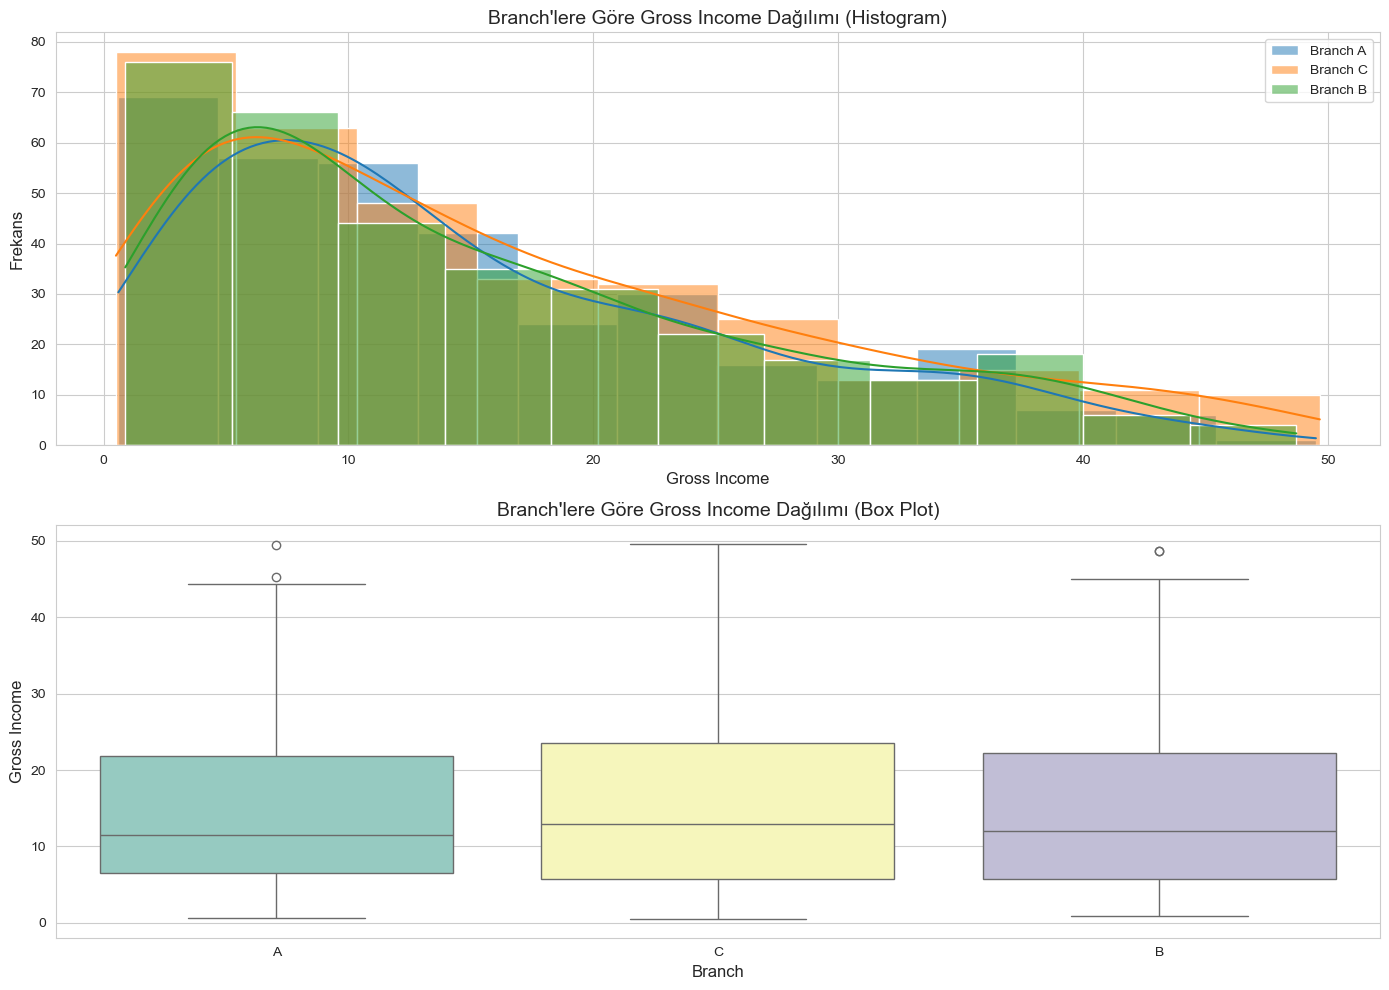

Branch'lere Göre Gross Income İstatistikleri:
        count       mean        std     min       25%       50%        75%  \
Branch                                                                       
A       340.0  14.874001  11.030477  0.6045  6.547125  11.46800  21.873375   
B       332.0  15.232024  11.545122  0.8875  5.711250  12.04200  22.170750   
C       328.0  16.052367  12.531470  0.5085  5.784500  12.92475  23.607375   

          max  
Branch         
A       49.49  
B       48.69  
C       49.65  

Her Branch'teki Veri Sayısı:
Branch
A    340
B    332
C    328
Name: count, dtype: int64


In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

sns.set_style("whitegrid")  
plt.figure(figsize=(14, 10))

branches = df['Branch'].unique()
n_branches = len(branches)

plt.subplot(2, 1, 1)
for i, branch in enumerate(branches):
    branch_data = df[df['Branch'] == branch]['gross income']
    sns.histplot(branch_data, alpha=0.5, label=f'Branch {branch}', kde=True)

plt.title('Branch\'lere Göre Gross Income Dağılımı (Histogram)', fontsize=14)
plt.xlabel('Gross Income', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.legend()


plt.subplot(2, 1, 2)
sns.boxplot(x='Branch', y='gross income', data=df, palette='Set3')
plt.title('Branch\'lere Göre Gross Income Dağılımı (Box Plot)', fontsize=14)
plt.xlabel('Branch', fontsize=12)
plt.ylabel('Gross Income', fontsize=12)

plt.tight_layout()
plt.show()


branch_stats = df.groupby('Branch')['gross income'].describe()
print("Branch\'lere Göre Gross Income İstatistikleri:")
print(branch_stats)


branch_counts = df['Branch'].value_counts()
print("\nHer Branch\'teki Veri Sayısı:")
print(branch_counts)

/var/folders/01/wv5mw4nj319bp2bhb77yll640000gn/T/ipykernel_20919/742364096.py:23: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({


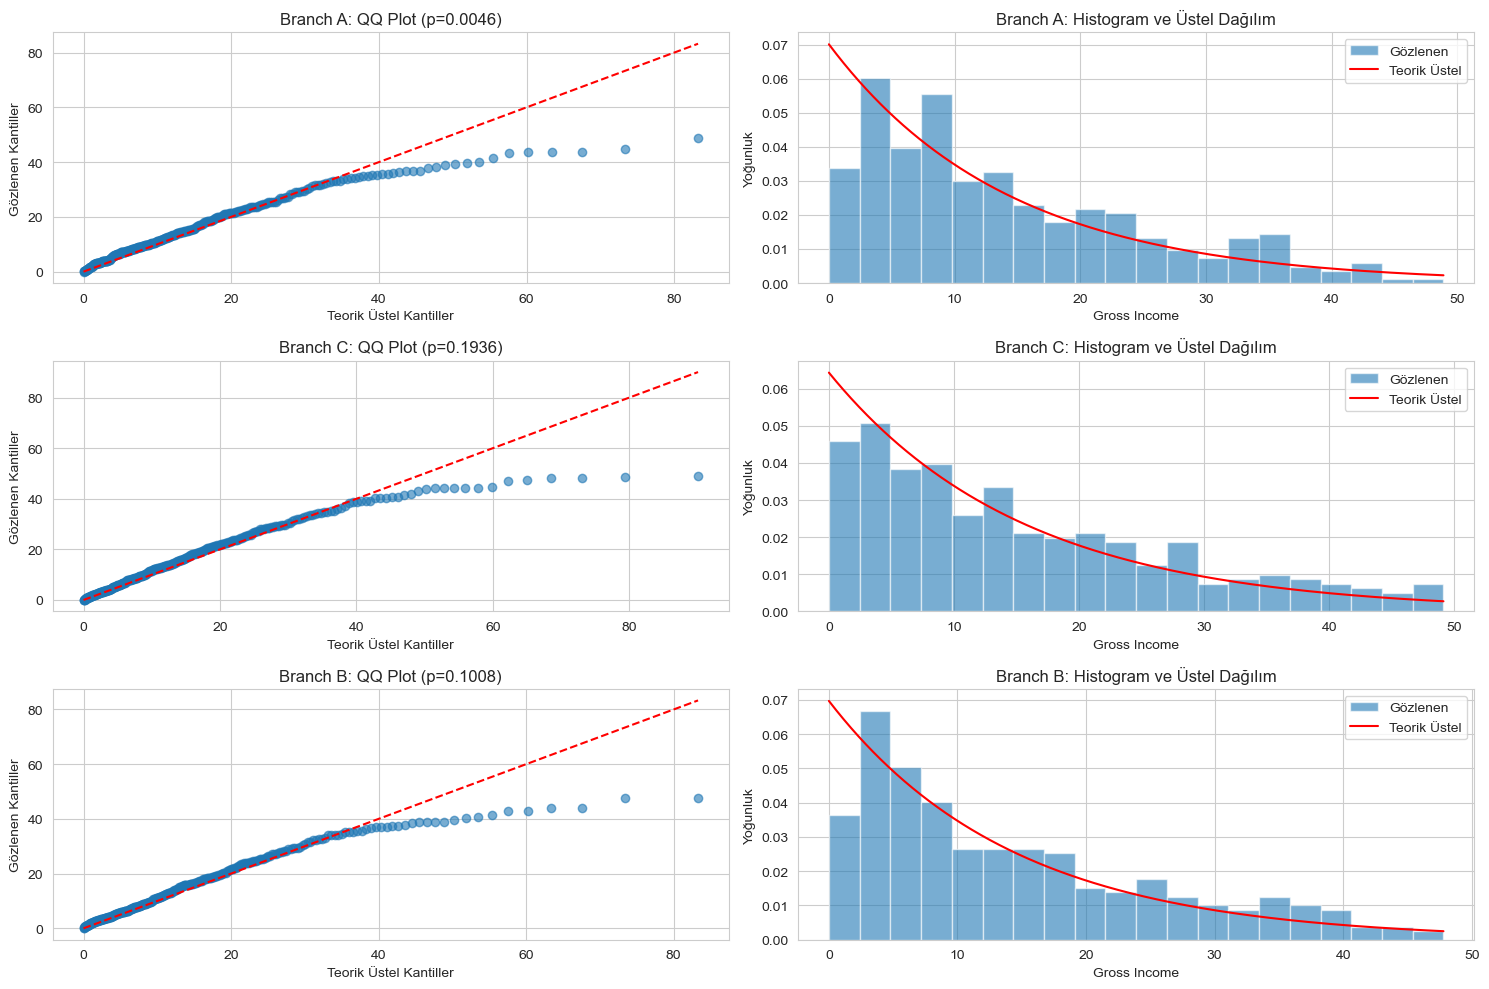

Üstel Dağılım Hipotez Testi Sonuçları:
  Branch  Test Statistic   p-value Fits Exponential
0      A        0.094020  0.004568            False
1      C        0.059142  0.193592             True
2      B        0.066567  0.100800             True

Özet:
Toplam 3 Branch'ten 2 tanesi üstel dağılıma uyuyor.


In [97]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import kstest, expon

branches = df['Branch'].unique()

results = pd.DataFrame(columns=['Branch', 'Test Statistic', 'p-value', 'Fits Exponential'])

plt.figure(figsize=(15, 10))

for i, branch in enumerate(branches):
    branch_data = df[df['Branch'] == branch]['gross income'].values
    
    branch_data_norm = branch_data - branch_data.min()
    
    loc = 0  
    scale = np.mean(branch_data_norm)  
    
    ks_statistic, p_value = kstest(branch_data_norm, 'expon', args=(loc, scale))
    
    results = pd.concat([results, pd.DataFrame({
        'Branch': [branch],
        'Test Statistic': [ks_statistic],
        'p-value': [p_value],
        'Fits Exponential': [p_value > 0.05]  
    })], ignore_index=True)
    
    plt.subplot(len(branches), 2, 2*i+1)
    sorted_data = np.sort(branch_data_norm)
    theoretical_quantiles = expon.ppf(np.arange(1, len(branch_data_norm)+1) / (len(branch_data_norm)+1), 
                                      loc=loc, scale=scale)
    plt.scatter(theoretical_quantiles, sorted_data, alpha=0.6)
    plt.plot([0, max(theoretical_quantiles)], [0, max(theoretical_quantiles)], 'r--')
    plt.title(f'Branch {branch}: QQ Plot (p={p_value:.4f})')
    plt.xlabel('Teorik Üstel Kantiller')
    plt.ylabel('Gözlenen Kantiller')
    
    plt.subplot(len(branches), 2, 2*i+2)
    x = np.linspace(0, max(branch_data_norm), 1000)
    plt.hist(branch_data_norm, bins=20, density=True, alpha=0.6, label='Gözlenen')
    plt.plot(x, expon.pdf(x, loc=loc, scale=scale), 'r', label='Teorik Üstel')
    plt.title(f'Branch {branch}: Histogram ve Üstel Dağılım')
    plt.xlabel('Gross Income')
    plt.ylabel('Yoğunluk')
    plt.legend()

plt.tight_layout()
plt.show()

print("Üstel Dağılım Hipotez Testi Sonuçları:")
print(results)

print("\nÖzet:")
print(f"Toplam {len(branches)} Branch'ten {results['Fits Exponential'].sum()} tanesi üstel dağılıma uyuyor.")

In [98]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_Cat
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Dilim 2 (12:45-15:30)
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Dilim 1 (10:00-12:45)
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Dilim 2 (12:45-15:30)
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Dilim 4 (18:15-21:00)
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Dilim 1 (10:00-12:45)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Dilim 2 (12:45-15:30)
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Dilim 3 (15:30-18:15)
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Dilim 2 (12:45-15:30)
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Dilim 3 (15:30-18:15)


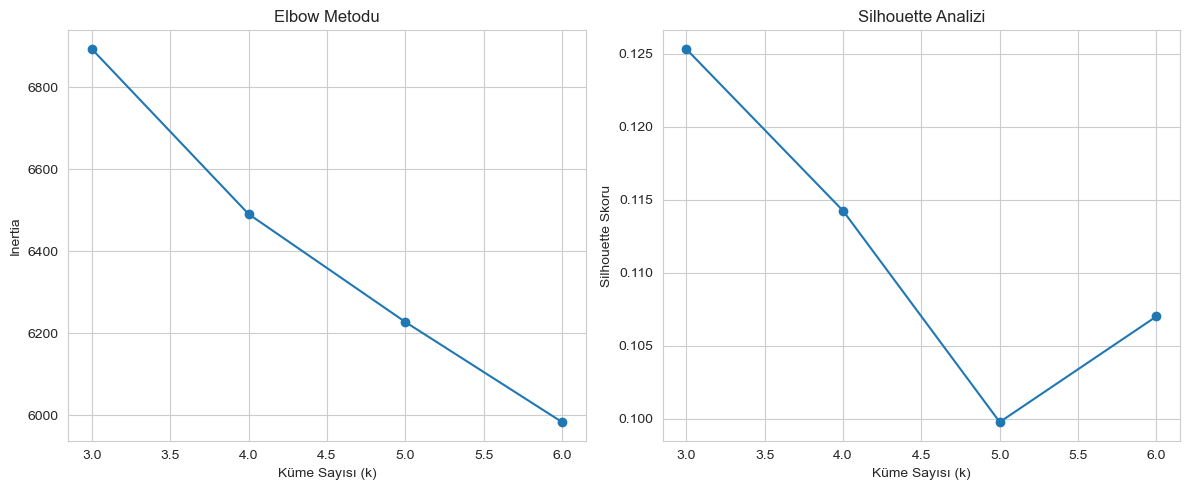

En iyi küme sayısı: 3


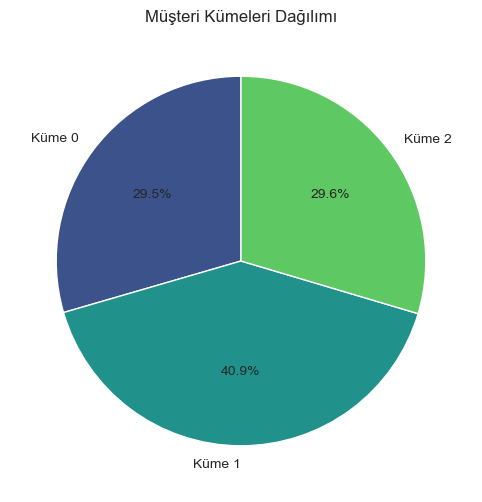

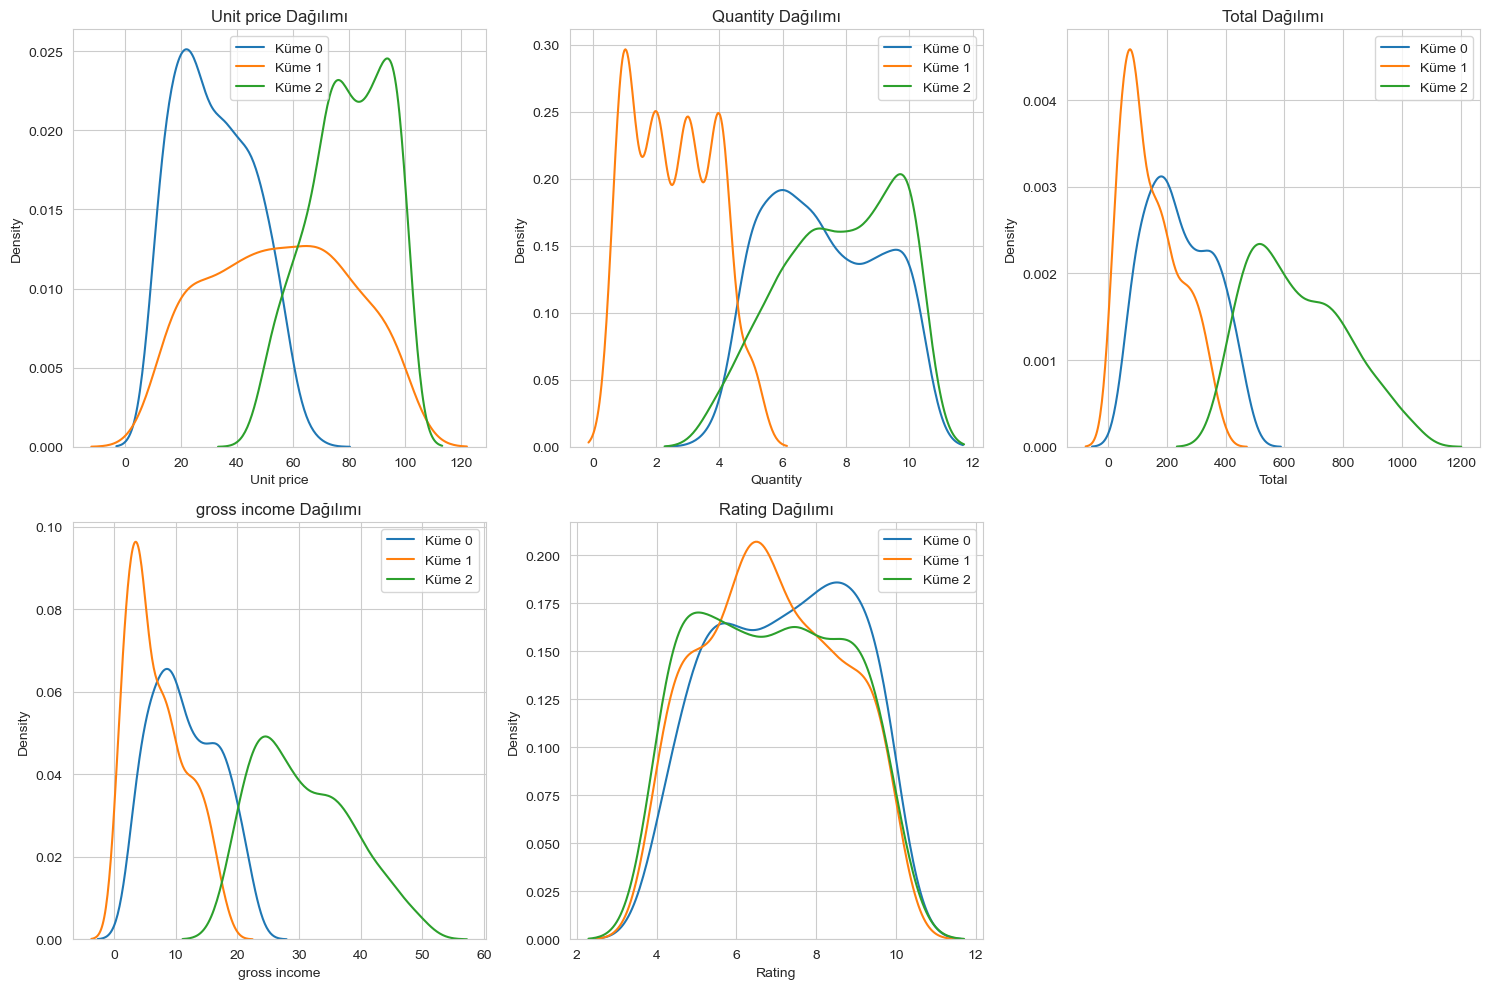

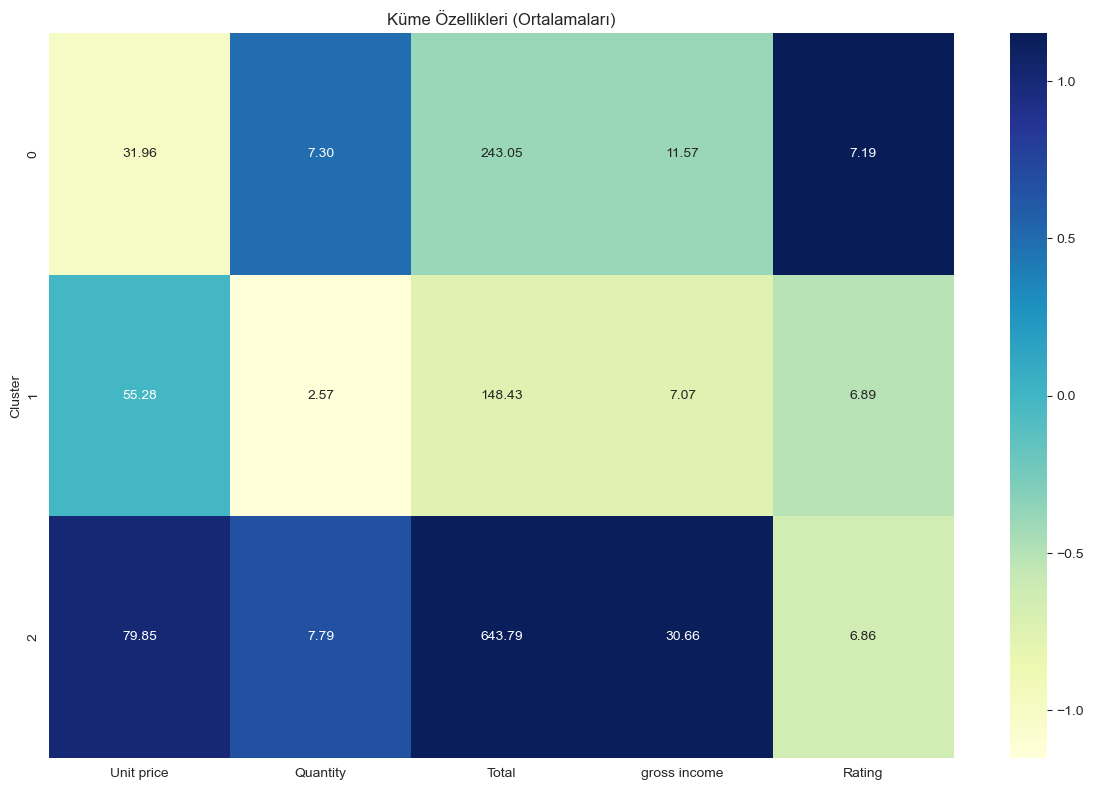


*** MÜŞTERİ SEGMENTLERİ ANALİZİ ***

KÜME 0: 29.5% (295 müşteri)

Sayısal Özellikler:
• Unit price: Ortalama = 31.96, Medyan = 30.20
• Quantity: Ortalama = 7.30, Medyan = 7.00
• Total: Ortalama = 243.05, Medyan = 225.01
• gross income: Ortalama = 11.57, Medyan = 10.71
• Rating: Ortalama = 7.19, Medyan = 7.30

Kategorik Özellikler:
• Branch: A (36.6%)
• City: Yangon (36.6%)
• Customer type: Normal (50.8%)
• Gender: Female (54.9%)
• Product line: Electronic accessories (19.0%)
• Payment: Cash (34.6%)
• Time_Cat: Dilim 4 (18:15-21:00) (26.8%)

Segment İsmi: Yüksek Miktarda Yüksek Harcama Female Normaller
Segment Açıklaması: Female ağırlıklı, yüksek fiyatlı ürünleri yüksek miktarda satın alan, düşük puanlı Normal müşteriler. Çoğunlukla Electronic accessories kategorisinde Cash ile ödeme yaparlar.

----------------------------------------------------------------------

KÜME 1: 40.9% (409 müşteri)

Sayısal Özellikler:
• Unit price: Ortalama = 55.28, Medyan = 55.50
• Quantity: Ortalama = 2.5

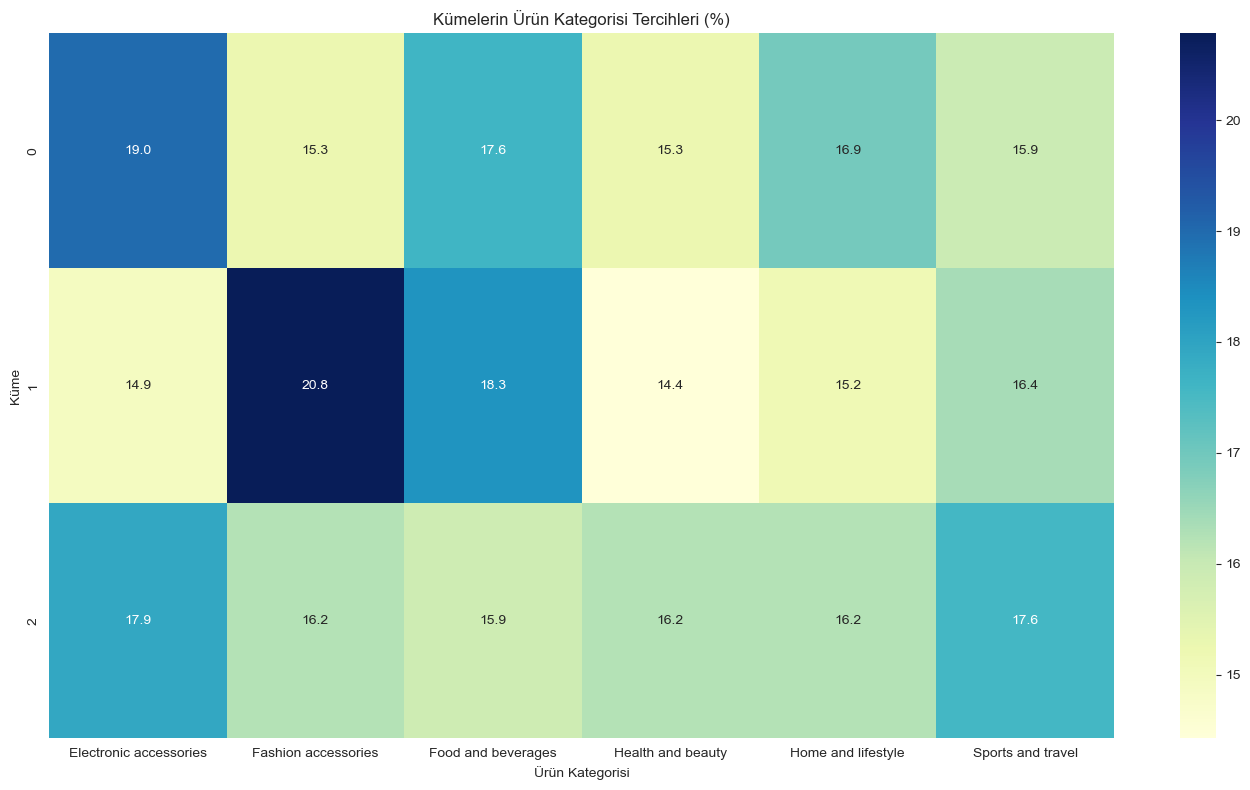

In [99]:

features = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']

categorical = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
if 'Time_Cat' in df.columns:
    categorical.append('Time_Cat')

df_encoded = pd.get_dummies(df, columns=categorical)

scaler = StandardScaler()
df_scaled = df_encoded.copy()
df_scaled[features] = scaler.fit_transform(df_encoded[features])

cluster_features = features + [col for col in df_encoded.columns if col not in df.columns]

silhouette_scores = []
inertia = []
K_range = range(3, 7)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled[cluster_features])
    silhouette_scores.append(silhouette_score(df_scaled[cluster_features], kmeans.labels_))
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, 'o-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Inertia')
plt.title('Elbow Metodu')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, 'o-')
plt.xlabel('Küme Sayısı (k)')
plt.ylabel('Silhouette Skoru')
plt.title('Silhouette Analizi')
plt.grid(True)

plt.tight_layout()
plt.show()

best_k = K_range[np.argmax(silhouette_scores)]
print(f"En iyi küme sayısı: {best_k}")

kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_scaled[cluster_features])

cluster_stats = df.groupby('Cluster').agg({
    'Unit price': ['mean', 'median'],
    'Quantity': ['mean', 'median'],
    'Total': ['mean', 'median'],
    'gross income': ['mean', 'median'],
    'Rating': ['mean', 'median']
})

categorical_distributions = {}

for cat in categorical:
    categorical_distributions[cat] = {}
    for cluster in range(best_k):
        value_counts = df[df['Cluster'] == cluster][cat].value_counts(normalize=True)
        dominant_value = value_counts.index[0]
        dominant_percentage = value_counts.iloc[0] * 100
        categorical_distributions[cat][cluster] = f"{dominant_value} ({dominant_percentage:.1f}%)"

plt.figure(figsize=(10, 6))
cluster_sizes = df['Cluster'].value_counts().sort_index()
plt.pie(cluster_sizes, labels=[f'Küme {i}' for i in range(best_k)], 
        autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', best_k))
plt.title('Müşteri Kümeleri Dağılımı')
plt.show()

features_for_viz = ['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']
plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_for_viz, 1):
    plt.subplot(2, 3, i)
    for cluster in range(best_k):
        sns.kdeplot(df[df['Cluster'] == cluster][feature], label=f'Küme {cluster}')
    plt.title(f'{feature} Dağılımı')
    plt.legend()

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
cluster_means = df.groupby('Cluster')[features_for_viz].mean()
cluster_means_norm = (cluster_means - cluster_means.mean()) / cluster_means.std()
sns.heatmap(cluster_means_norm, annot=cluster_means.round(2), fmt='.2f', cmap='YlGnBu')
plt.title('Küme Özellikleri (Ortalamaları)')
plt.tight_layout()
plt.show()

print("\n*** MÜŞTERİ SEGMENTLERİ ANALİZİ ***\n")

for cluster in range(best_k):
    cluster_size = len(df[df['Cluster'] == cluster])
    cluster_percentage = cluster_size / len(df) * 100
    
    print(f"KÜME {cluster}: {cluster_percentage:.1f}% ({cluster_size} müşteri)")
    
    
    print("\nSayısal Özellikler:")
    for feature in features_for_viz:
        mean_val = df[df['Cluster'] == cluster][feature].mean()
        median_val = df[df['Cluster'] == cluster][feature].median()
        print(f"• {feature}: Ortalama = {mean_val:.2f}, Medyan = {median_val:.2f}")
    
    print("\nKategorik Özellikler:")
    for cat in categorical:
        print(f"• {cat}: {categorical_distributions[cat][cluster]}")
    
    unit_price_rank = np.argsort(np.argsort([df[df['Cluster'] == i]['Unit price'].mean() for i in range(best_k)]))[::-1][cluster]
    quantity_rank = np.argsort(np.argsort([df[df['Cluster'] == i]['Quantity'].mean() for i in range(best_k)]))[::-1][cluster]
    total_rank = np.argsort(np.argsort([df[df['Cluster'] == i]['Total'].mean() for i in range(best_k)]))[::-1][cluster]
    rating_rank = np.argsort(np.argsort([df[df['Cluster'] == i]['Rating'].mean() for i in range(best_k)]))[::-1][cluster]
    
    price_adj = ["Ekonomik", "Orta Fiyatlı", "Yüksek Fiyatlı"][min(unit_price_rank, 2)]
    quantity_adj = ["Az Miktarda", "Orta Miktarda", "Yüksek Miktarda"][min(quantity_rank, 2)]
    spending_adj = ["Düşük Harcama", "Orta Harcama", "Yüksek Harcama"][min(total_rank, 2)]
    rating_adj = ["Düşük Puanlı", "Orta Puanlı", "Yüksek Puanlı"][min(rating_rank, 2)]
    
    gender = df[df['Cluster'] == cluster]['Gender'].value_counts().index[0]
    customer_type = df[df['Cluster'] == cluster]['Customer type'].value_counts().index[0]
    product_line = df[df['Cluster'] == cluster]['Product line'].value_counts().index[0]
    payment = df[df['Cluster'] == cluster]['Payment'].value_counts().index[0]
    
    segment_name = f"{quantity_adj} {spending_adj} {gender} {customer_type}ler"
    segment_desc = (f"{gender} ağırlıklı, {price_adj.lower()} ürünleri {quantity_adj.lower()} satın alan, "
                  f"{rating_adj.lower()} {customer_type} müşteriler. "
                  f"Çoğunlukla {product_line} kategorisinde {payment} ile ödeme yaparlar.")
    
    print(f"\nSegment İsmi: {segment_name}")
    print(f"Segment Açıklaması: {segment_desc}")
    print("\n" + "-"*70 + "\n")

plt.figure(figsize=(14, 8))
product_prefs = pd.crosstab(
    df['Cluster'], 
    df['Product line'],
    normalize='index'
) * 100

sns.heatmap(product_prefs, annot=True, fmt='.1f', cmap='YlGnBu')
plt.title('Kümelerin Ürün Kategorisi Tercihleri (%)')
plt.ylabel('Küme')
plt.xlabel('Ürün Kategorisi')
plt.tight_layout()
plt.show()

In [100]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_Cat,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Dilim 2 (12:45-15:30),2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Dilim 1 (10:00-12:45),0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Dilim 2 (12:45-15:30),0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Dilim 4 (18:15-21:00),2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Dilim 1 (10:00-12:45),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Dilim 2 (12:45-15:30),1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Dilim 3 (15:30-18:15),2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Dilim 2 (12:45-15:30),1
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Dilim 3 (15:30-18:15),1


In [101]:
df.groupby('Cluster').agg({'gross income':'mean'}).sort_values('gross income',ascending=False)

,gross income
Cluster,
2,30.656632
0,11.573686
1,7.067894


In [102]:
df['Cluster'] = df['Cluster'].astype(object)

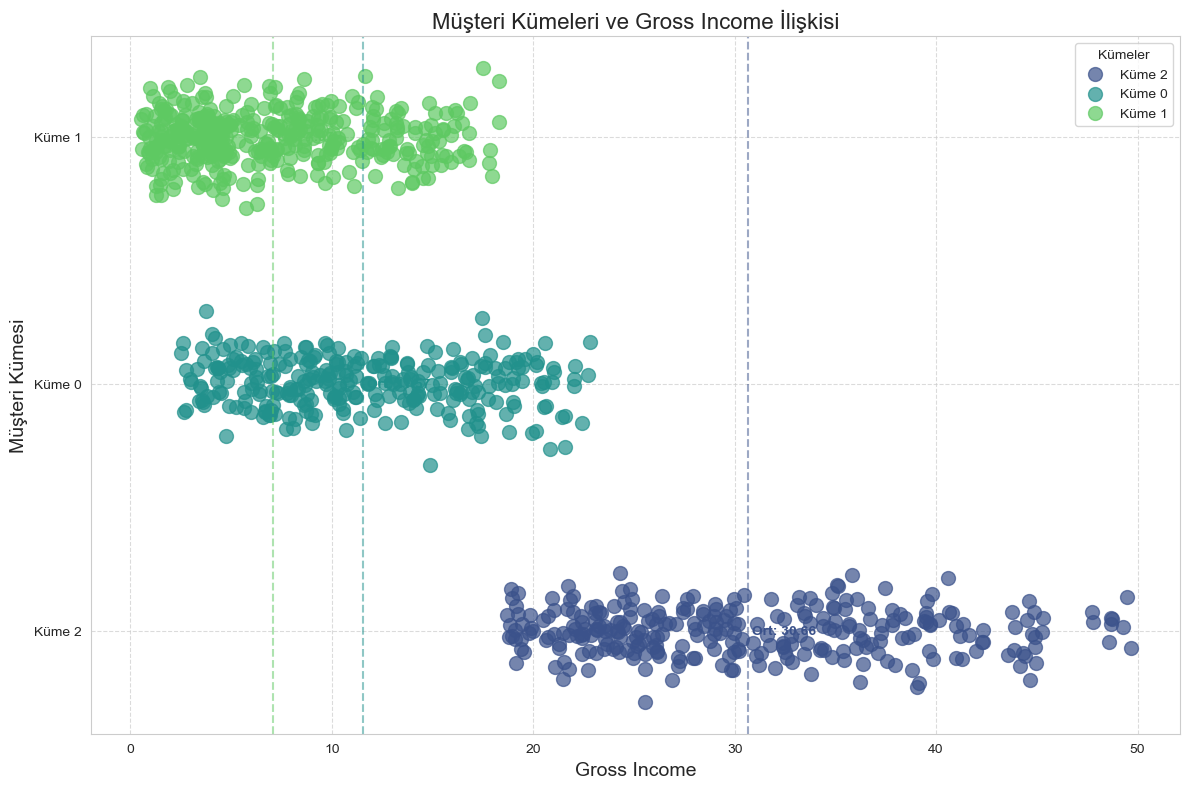

/var/folders/01/wv5mw4nj319bp2bhb77yll640000gn/T/ipykernel_20919/268655633.py:41: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='gross income', data=df, palette='viridis')


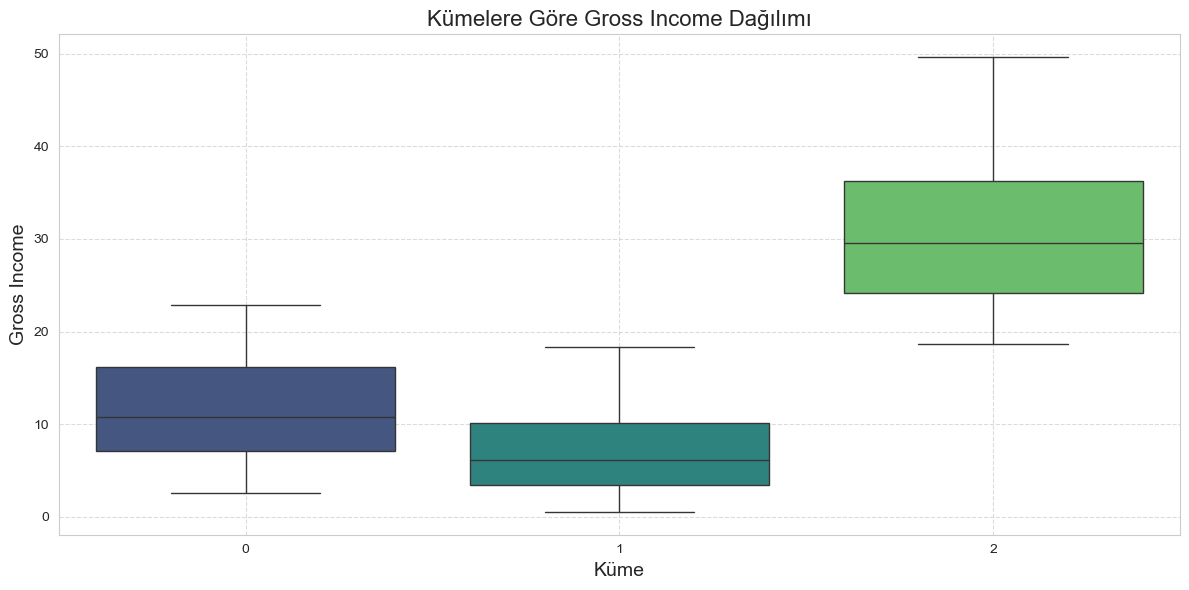

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.figure(figsize=(12, 8))

clusters = df['Cluster'].unique()
colors = sns.color_palette('viridis', len(clusters))

for i, cluster in enumerate(clusters):
    cluster_data = df[df['Cluster'] == cluster]
    
    plt.scatter(
        cluster_data['gross income'],  
        np.random.normal(i, 0.1, size=len(cluster_data)),  
        color=colors[i],
        alpha=0.7,
        s=100,
        label=f'Küme {cluster}'
    )

plt.title('Müşteri Kümeleri ve Gross Income İlişkisi', fontsize=16)
plt.xlabel('Gross Income', fontsize=14)
plt.yticks(range(len(clusters)), [f'Küme {cluster}' for cluster in clusters])
plt.ylabel('Müşteri Kümesi', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Kümeler')

for i, cluster in enumerate(clusters):
    cluster_income = df[df['Cluster'] == cluster]['gross income']
    mean_income = cluster_income.mean()
    
    plt.axvline(mean_income, color=colors[i], linestyle='--', alpha=0.5)
    plt.text(mean_income, i, f' Ort: {mean_income:.2f}', 
             verticalalignment='center', color=colors[i], fontweight='bold')

plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='gross income', data=df, palette='viridis')
plt.title('Kümelere Göre Gross Income Dağılımı', fontsize=16)
plt.xlabel('Küme', fontsize=14)
plt.ylabel('Gross Income', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



In [104]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_Cat,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Dilim 2 (12:45-15:30),2
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Dilim 1 (10:00-12:45),0
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Dilim 2 (12:45-15:30),0
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Dilim 4 (18:15-21:00),2
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Dilim 1 (10:00-12:45),2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Dilim 2 (12:45-15:30),1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Dilim 3 (15:30-18:15),2
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Dilim 2 (12:45-15:30),1
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Dilim 3 (15:30-18:15),1


In [105]:
cluster_mapping = {
    0: "Sınıf 1",
    1: "Sınıf 2", 
    2: "Sınıf 3",
  
}

df['Cluster'] = df['Cluster'].map(lambda x: cluster_mapping.get(x, f"Sınıf {x+1}"))

print("Cluster sütununun yeni değerleri:")
print(df['Cluster'].value_counts())

print("\nİlk 5 satır:")
print(df[['Cluster', 'gross income']].head())

Cluster sütununun yeni değerleri:
Cluster
Sınıf 2    409
Sınıf 3    296
Sınıf 1    295
Name: count, dtype: int64

İlk 5 satır:
   Cluster  gross income
0  Sınıf 3       26.1415
1  Sınıf 1        3.8200
2  Sınıf 1       16.2155
3  Sınıf 3       23.2880
4  Sınıf 3       30.2085


In [106]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_Cat,Cluster
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Dilim 2 (12:45-15:30),Sınıf 3
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Dilim 1 (10:00-12:45),Sınıf 1
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Dilim 2 (12:45-15:30),Sınıf 1
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Dilim 4 (18:15-21:00),Sınıf 3
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Dilim 1 (10:00-12:45),Sınıf 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Dilim 2 (12:45-15:30),Sınıf 2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Dilim 3 (15:30-18:15),Sınıf 3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Dilim 2 (12:45-15:30),Sınıf 2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Dilim 3 (15:30-18:15),Sınıf 2


In [107]:
df['Cluster'].value_counts()

Cluster
Sınıf 2    409
Sınıf 3    296
Sınıf 1    295
Name: count, dtype: int64

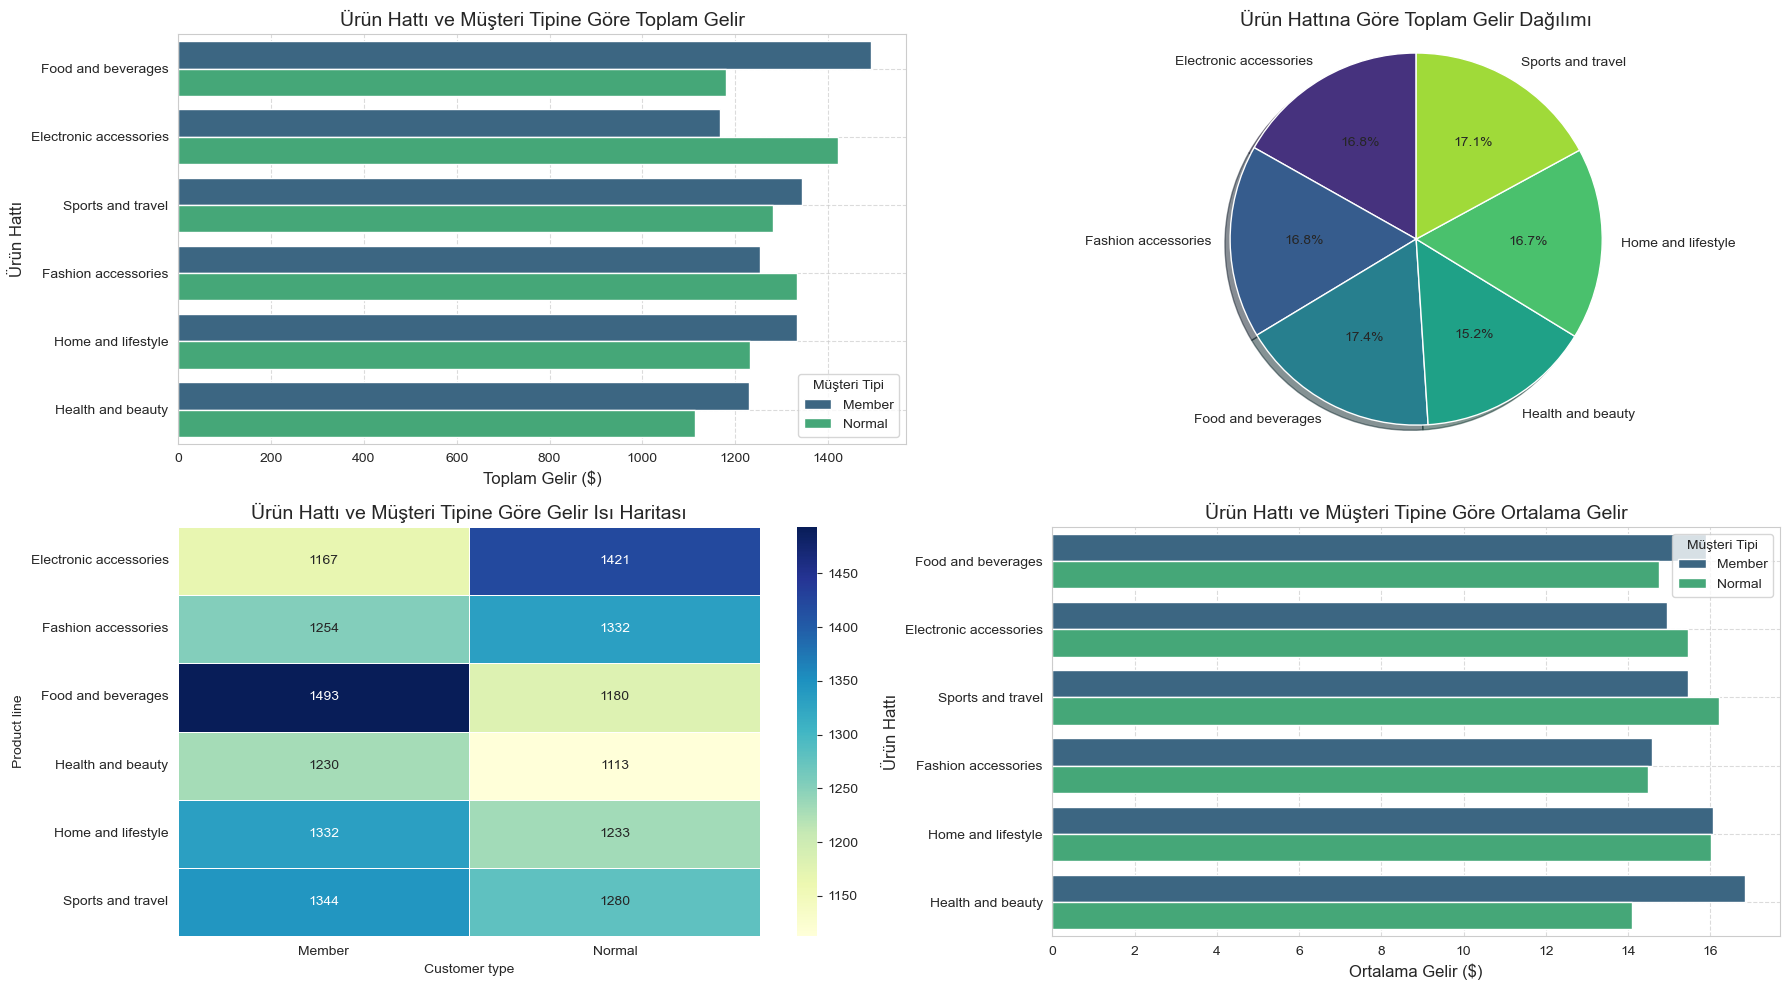

In [108]:
income_analysis = df.groupby(['Product line', 'Customer type']).agg({
    'gross income': ['sum', 'mean', 'count'],
    'Total': ['sum', 'mean'],
    'Quantity': ['sum', 'mean']
}).reset_index()

income_analysis.columns = [
    'Product line', 'Customer type', 
    'Toplam Gelir', 'Ortalama Gelir', 'İşlem Sayısı',
    'Toplam Satış', 'Ortalama Satış',
    'Toplam Miktar', 'Ortalama Miktar'
]

total_income = income_analysis['Toplam Gelir'].sum()
income_analysis['Gelir Yüzdesi'] = income_analysis['Toplam Gelir'] / total_income * 100

income_analysis = income_analysis.sort_values('Toplam Gelir', ascending=False)

plt.figure(figsize=(18, 10))

plt.subplot(2, 2, 1)
sns.barplot(
    data=income_analysis, 
    y='Product line', 
    x='Toplam Gelir', 
    hue='Customer type',
    palette='viridis'
)
plt.title('Ürün Hattı ve Müşteri Tipine Göre Toplam Gelir', fontsize=14)
plt.xlabel('Toplam Gelir ($)', fontsize=12)
plt.ylabel('Ürün Hattı', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Müşteri Tipi', fontsize=10)

plt.subplot(2, 2, 2)
product_income = df.groupby('Product line')['gross income'].sum()
plt.pie(
    product_income, 
    labels=product_income.index, 
    autopct='%1.1f%%',
    startangle=90, 
    shadow=True,
    colors=sns.color_palette('viridis', len(product_income))
)
plt.title('Ürün Hattına Göre Toplam Gelir Dağılımı', fontsize=14)
plt.axis('equal')  # Daireyi düzgün göstermek için

plt.subplot(2, 2, 3)
heatmap_data = income_analysis.pivot(
    index='Product line', 
    columns='Customer type', 
    values='Toplam Gelir'
)
sns.heatmap(
    heatmap_data, 
    annot=True, 
    fmt='.0f',
    cmap='YlGnBu',
    linewidths=.5
)
plt.title('Ürün Hattı ve Müşteri Tipine Göre Gelir Isı Haritası', fontsize=14)

plt.subplot(2, 2, 4)
sns.barplot(
    data=income_analysis, 
    y='Product line', 
    x='Ortalama Gelir', 
    hue='Customer type',
    palette='viridis'
)
plt.title('Ürün Hattı ve Müşteri Tipine Göre Ortalama Gelir', fontsize=14)
plt.xlabel('Ortalama Gelir ($)', fontsize=12)
plt.ylabel('Ürün Hattı', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Müşteri Tipi', fontsize=10)

plt.tight_layout()
plt.show()

### Regresyon Modelleri 

In [109]:
features

['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']

In [110]:
features = df.drop(columns=['Invoice ID','Unit price','Quantity','Total','cogs','Tax 5%','gross margin percentage','Date','Time'])

categorical = ['Product line', 'Customer type', 'Payment', 'Branch', 'City', 'Gender', 'Time_Cat', 'Cluster']

features_encoded = pd.get_dummies(features, columns=categorical,drop_first=True,dtype=int)

scaler = StandardScaler()

numerical_cols = ['Rating', 'gross income']
features_scaled = features_encoded.copy()
features_scaled[numerical_cols] = scaler.fit_transform(features_encoded[numerical_cols])

In [111]:
features_scaled

,gross income,Rating,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Customer type_Normal,Payment_Credit card,Payment_Ewallet,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Gender_Male,Time_Cat_Dilim 2 (12:45-15:30),Time_Cat_Dilim 3 (15:30-18:15),Time_Cat_Dilim 4 (18:15-21:00),Cluster_Sınıf 2,Cluster_Sınıf 3
0,0.919607,1.238443,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.987730,1.529527,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2,0.071446,0.248760,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0
3,0.675780,0.830927,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1
4,1.267125,-0.973790,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,-1.141750,-0.449840,0,0,1,0,0,1,0,1,0,1,1,0,1,1,0,0,1,0
996,2.846340,-1.497741,0,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,0,1
997,-1.178109,0.423410,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0
998,-1.032932,-1.672391,0,0,0,1,0,1,0,0,0,0,0,1,1,0,1,0,1,0


In [112]:


X = features_scaled.drop(columns=['gross income'])
y = features_scaled['gross income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [113]:
models = {
    'lr': LinearRegression(),
    'rf': RandomForestRegressor(),
    'dt': DecisionTreeRegressor(),
    'svr': SVR()
}


for name, model in models.items():
    model.fit(X_train, y_train)  
    y_pred = model.predict(X_test)  
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    print(f"\nModel: {name}")
    print(f"  MSE : {mse:.4f}")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  R²  : {r2:.4f}")
    print(f"  MAE : {mae:.4f}")



Model: lr
  MSE : 0.2876
  RMSE: 0.5363
  R²  : 0.7330
  MAE : 0.4472

Model: rf
  MSE : 0.3204
  RMSE: 0.5660
  R²  : 0.7025
  MAE : 0.4686

Model: dt
  MSE : 0.5829
  RMSE: 0.7634
  R²  : 0.4589
  MAE : 0.6096

Model: svr
  MSE : 0.3594
  RMSE: 0.5995
  R²  : 0.6663
  MAE : 0.4927


In [115]:
df['Net Income'] = df['gross income']*0.95


In [118]:
df['Net Income'] = df['Net Income'].round(4)

/var/folders/01/wv5mw4nj319bp2bhb77yll640000gn/T/ipykernel_20919/3661289764.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Cluster',y='Net Income',data=df,palette='viridis')


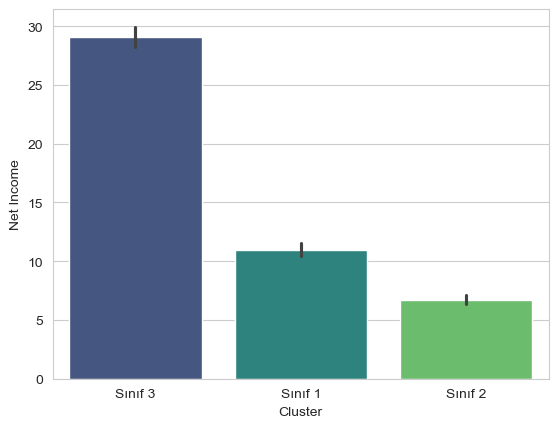

In [122]:
sns.barplot(x='Cluster',y='Net Income',data=df,palette='viridis')
plt.show()



In [124]:

df['Profit Margin (%)'] = (df['Net Income'] / df['Total']) * 100

cluster_profit_margin = df.groupby('Cluster')['Profit Margin (%)'].mean()

print(cluster_profit_margin)

Cluster
Sınıf 1    4.523807
Sınıf 2    4.523801
Sınıf 3    4.523808
Name: Profit Margin (%), dtype: float64


In [125]:
product_line_profit_margin = df.groupby('Product line')['Profit Margin (%)'].mean()

print(product_line_profit_margin)






Product line
Electronic accessories    4.523804
Fashion accessories       4.523804
Food and beverages        4.523807
Health and beauty         4.523803
Home and lifestyle        4.523807
Sports and travel         4.523805
Name: Profit Margin (%), dtype: float64


In [126]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time_Cat,Cluster,Net Income,Profit Margin (%)
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Dilim 2 (12:45-15:30),Sınıf 3,24.8344,4.523805
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Dilim 1 (10:00-12:45),Sınıf 1,3.6290,4.523810
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,...,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Dilim 2 (12:45-15:30),Sınıf 1,15.4047,4.523802
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,...,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Dilim 4 (18:15-21:00),Sınıf 3,22.1236,4.523810
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,...,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Dilim 1 (10:00-12:45),Sınıf 3,28.6981,4.523813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,...,13:46:00,Ewallet,40.35,4.761905,2.0175,6.2,Dilim 2 (12:45-15:30),Sınıf 2,1.9166,4.523751
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,...,17:16:00,Ewallet,973.80,4.761905,48.6900,4.4,Dilim 3 (15:30-18:15),Sınıf 3,46.2555,4.523810
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,...,13:22:00,Cash,31.84,4.761905,1.5920,7.7,Dilim 2 (12:45-15:30),Sınıf 2,1.5124,4.523810
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,...,15:33:00,Cash,65.82,4.761905,3.2910,4.1,Dilim 3 (15:30-18:15),Sınıf 2,3.1264,4.523737


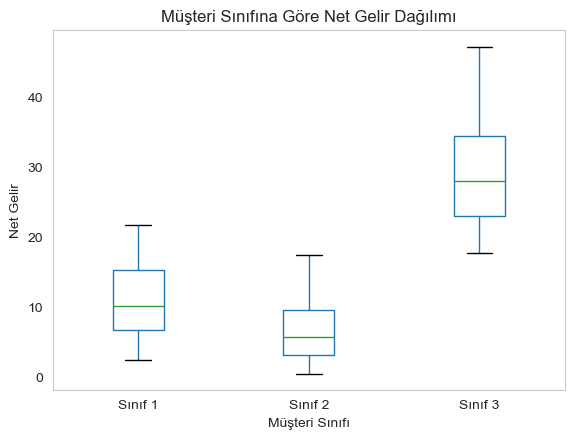

In [131]:
import matplotlib.pyplot as plt

df.boxplot(column='Net Income', by='Cluster', grid=False)
plt.title('Müşteri Sınıfına Göre Net Gelir Dağılımı')
plt.suptitle('')
plt.xlabel('Müşteri Sınıfı')
plt.ylabel('Net Gelir')
plt.show()